In [91]:
salary = [1,11,40,45,68,65,68,78,90,57,54,91,92,88,68,57,48,99,101,68,77,110,140,200]

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [93]:
# five point summary
np.quantile(salary,[0, 0.25, 0.50, 0.75, 1])

array([  1.  ,  56.25,  68.  ,  91.25, 200.  ])

In [94]:
df = pd.DataFrame(salary, columns=['salary'])

In [95]:
df

,salary
0,1
1,11
2,40
3,45
4,68
5,65
6,68
7,78
8,90
9,57


In [96]:
df.describe()

,salary
count,24.000000
mean,75.666667
std,40.151525
min,1.000000
25%,56.250000
50%,68.000000
75%,91.250000
max,200.000000


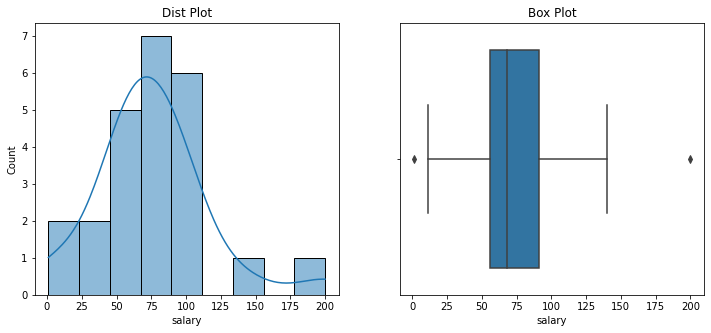

In [97]:
# TO check outliers >> distplot, boxpolt

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(df['salary'], kde=True)
plt.title("Dist Plot")

plt.subplot(1,2,2)
sns.boxplot(data = df, x="salary")
plt.title("Box Plot")

plt.show()

In [98]:
# dropping the outlier
# capping the outlier
# replace with mean and median
# scaling and tranfromation

In [99]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)

In [100]:
Q1

56.25

In [101]:
Q3

91.25

In [102]:
IQR = Q3 - Q1
IQR

35.0

In [103]:
lower_fence = Q1-(1.5*IQR)
lower_fence 

3.75

In [104]:
upper_fence = Q3+(1.5*IQR)
upper_fence

143.75

In [105]:
df.shape

(24, 1)

# dropping outlier 

In [106]:
# dropping outlier 
df_filtered = df[(df.salary >= lower_fence) & (df.salary <= upper_fence)]
df_filtered

,salary
1,11
2,40
3,45
4,68
5,65
6,68
7,78
8,90
9,57
10,54


In [107]:
df_filtered.shape

(22, 1)

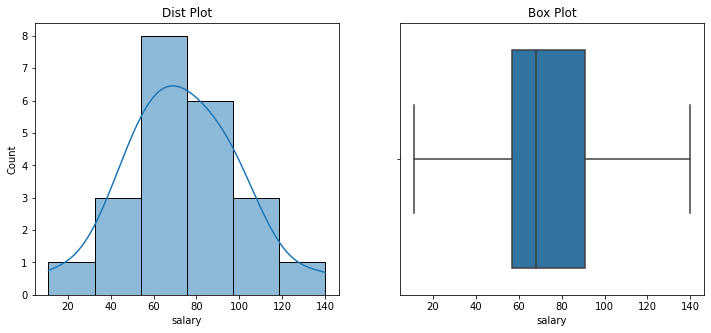

In [108]:
# after outlier treatment
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(df_filtered['salary'], kde=True)
plt.title("Dist Plot")

plt.subplot(1,2,2)
sns.boxplot(data = df_filtered, x="salary")
plt.title("Box Plot")

plt.show()

# Replace outliers with mean and median

In [109]:

df['salary_mean_imputed'] = np.where((df.salary >= upper_fence) | (df.salary <= lower_fence), df['salary'].mean(), df['salary'])

In [110]:
df

,salary,salary_mean_imputed
0,1,75.666667
1,11,11.000000
2,40,40.000000
3,45,45.000000
4,68,68.000000
5,65,65.000000
6,68,68.000000
7,78,78.000000
8,90,90.000000
9,57,57.000000


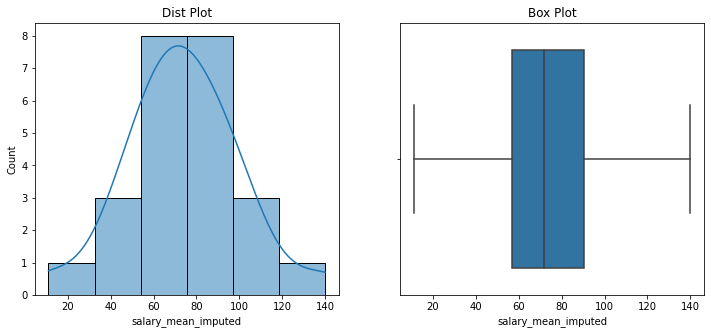

In [111]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(df['salary_mean_imputed'], kde=True)
plt.title("Dist Plot")

plt.subplot(1,2,2)
sns.boxplot(data = df, x="salary_mean_imputed")
plt.title("Box Plot")

plt.show()

# capping >> replacing outlier with the nearest value that is not a outlier

In [112]:
lower_cap = df['salary'].quantile(0.05)  #lower cap as 5th percentile
lower_cap

15.350000000000005

In [113]:
upper_cap = df['salary'].quantile(0.95)  #upper cap as 95th percentile
upper_cap

135.49999999999994

In [115]:
df['salary_capped'] = np.where(df['salary'] < lower_cap, lower_cap,
                               np.where(df['salary'] > upper_cap, upper_cap, df['salary']))

In [116]:
df

,salary,salary_mean_imputed,salary_capped
0,1,75.666667,15.35
1,11,11.000000,15.35
2,40,40.000000,40.00
3,45,45.000000,45.00
4,68,68.000000,68.00
5,65,65.000000,65.00
6,68,68.000000,68.00
7,78,78.000000,78.00
8,90,90.000000,90.00
9,57,57.000000,57.00


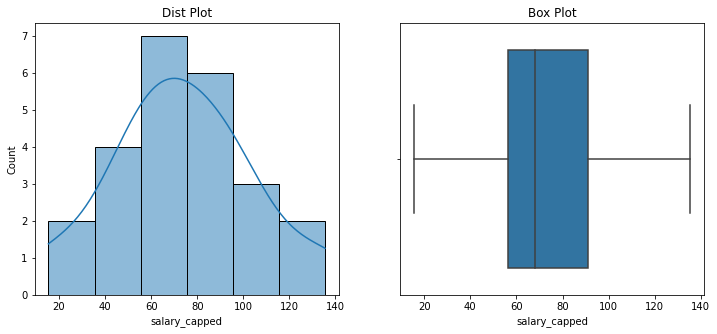

In [118]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(df['salary_capped'], kde=True)
plt.title("Dist Plot")

plt.subplot(1,2,2)
sns.boxplot(data = df, x="salary_capped")
plt.title("Box Plot")

plt.show()